# Designing a Predictive Model for Students’ Dropout and Academic Success

##### Group Members (Group 46): 
Erin Da, Lesley Mai, Xiaofei Sun, Yuchen Xu   
<hr style="opacity: 0.3" />

## 1. Introduction

Dropout rates and academic success play vital roles within higher education institutions, the academic success not only affects the lives of students and their families but also affects society at large. The most challenging problem that higher education institutions must address to increase their success is dropout<sup>[1]</sup>. Therefore, harnessing the available data to predict students’ dropout and academic success status holds significant worth.

Our [dataset](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) originates from a higher education institution, including students enrollment information (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters during 2008-2019<sup>[2]</sup>. Given a set of related features of a student, we can classify a student's academic status (enrolled, graduate, or dropout). With this knowledge, the tutoring team can assist students more precisely.

<img src='https://modernlearners.com/wp-content/uploads/2016/05/rsz_students_dropping_out-shutterstock-cropped.jpg' width='260'> <img src='https://www.touro.edu/media/touro-college/content-assets/images/events/iStock-1199590896.jpg' width='387'> <img src= 'https://northshorefamilyservices.com/wp-content/uploads/2017/07/AdobeStock_85731355.jpeg' width='327'>
###### *Source: [Dropout](https://modernlearners.com/what-do-we-mean-by-dropout/); [Graduate](https://www.touro.edu/news--events/events/dgs-commencement-2021.php);  [Academic_Path](https://northshorefamilyservices.com/secrets-middle-school-success/)*

#### Research question

We aim to **employ the K-Nearest Neighbors (KNN) classification algorithm to predict students' dropout and academic success statuses**. KNN is an intuitive algorithm that classifies new data points based on their similarity to existing data points in the feature space<sup>[3]</sup>. 

Moreover, we seek to identify the specific metrics (variables) that create the most optimal model of the prediction on student dropout and academic success.

## 2. Methods & Results

### 2.1 Overview of our Methodology

The academic performance dataset captures several factors, such as tuition fee payment status and curricular achievements, to predict a student's academic success status. In order to build a comprehensive model for better determination, our team decided to combine the factors provided to predict `Target` **Graduate** and **Dropout** statuses. Here is an overview of the data analysis methodology we employed:
<ol>
<li><strong>Reading & Wrangling:</strong> The data is read and wrangled into a tidy dataset.</li>
<li><strong>Train/Test split:</strong> The tidy dataframe is split into a training set and a testing set. The training set is used to build the model (including the selection of predictors), while the testing set is used to evaluate its performance.</li>
<li><strong>Predictor variables selection:</strong> The training set is categorized into binary and numerical features. Various visualizations are used to choose the initial predictors. Forward selection is then used to determine the combination of predictors that would provide the highest prediction accuracy. This involves starting with no features and incrementally adding them one by one to evaluate performance improvements. </li>
<li><strong>K-Nearest Neighbor classification:</strong> The model is fine-tuned with cross-validation to identify the optimal K value. Subsequently, the model is reconfigured and re-trained using the best K parameter, which is then used to predict the testing set for final model accuracy validation.</li>
<li><strong>Results Visualization and Conclusion:</strong> The results are visualized through plots comparing predicted and actual data. Conclusions are drawn based on the analysis and visualizations.</li>    
</ol>

### 2.2 Preliminary exploratory data analysis

Loading requisite packages for analysis.

In [1]:
# packages
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)
options(repr.matrix.max.rows = 9) #limits output of dataframes to 9 rows

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

This data, stored in a `.csv` file, is accessed through a URL and loaded into R using the `read_delim()`. Since the column names contain spaces, which can cause issues in R, the `make.names()` is used to sanitize and convert them into valid R variable names. 

In [2]:
# load data
url <- "https://raw.githubusercontent.com/lesleymai/ds_group/main/academic_success.csv"

# use read_delim() to load our data as this dataset uses ; as a separator.
students_data <- read_delim(url, show_col_types = FALSE)

# convert column names to valid R names
colnames(students_data) <- make.names(colnames(students_data))

summary(students_data)

 Marital.status  Application.mode Application.order     Course    
 Min.   :1.000   Min.   : 1.00    Min.   :0.000     Min.   :  33  
 1st Qu.:1.000   1st Qu.: 1.00    1st Qu.:1.000     1st Qu.:9085  
 Median :1.000   Median :17.00    Median :1.000     Median :9238  
 Mean   :1.179   Mean   :18.67    Mean   :1.728     Mean   :8857  
 3rd Qu.:1.000   3rd Qu.:39.00    3rd Qu.:2.000     3rd Qu.:9556  
 Max.   :6.000   Max.   :57.00    Max.   :9.000     Max.   :9991  
 Daytime.evening.attendance. Previous.qualification
 Min.   :0.0000              Min.   : 1.000        
 1st Qu.:1.0000              1st Qu.: 1.000        
 Median :1.0000              Median : 1.000        
 Mean   :0.8908              Mean   : 4.578        
 3rd Qu.:1.0000              3rd Qu.: 1.000        
 Max.   :1.0000              Max.   :43.000        
 Previous.qualification..grade.  Nacionality      Mother.s.qualification
 Min.   : 95.0                  Min.   :  1.000   Min.   : 1.00         
 1st Qu.:125.0       

<center>Table 1: Raw students' performance dataset</center>

Using `apply()` to iterate over each row, and `is.na()` to check for NA values.

In [3]:
# count the number of rows containing at least one NA
num_na_rows <- sum(apply(is.na(students_data), 1, any))
print(num_na_rows)

# we can see that there're no NA rows in the dataset

[1] 0


As we introduced before, this data contains **3** student's academic status: enrolled, graduate and dropout. Here, We focus on predicting if a student achieves academic success by classifying him or her as a graduated student or a dropout, so we filter out the enrolled students.

The rows in which the Target column is equal to "Enrolled" is filtered out by `filter()`. Using `mutate()` modifies the Target column, combined with `as.factor()` to convert it to a factor variable.

In [4]:
students_data_filtered <-  students_data |>
    filter(Target != "Enrolled") |> # fitler out "Enrolled"
    mutate(Target = as.factor(Target)) # convert the 'Target' column to a factor variable.
students_data_filtered

# the resulting dataset below is our wrangled dataset with 3630 useful observations.

Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance.,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17,5,171,1,1,122,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,2,9773,1,1,120,105,1,1,⋯,0,6,6,2,11.0,0,11.1,0.6,2.02,Dropout
1,1,1,9500,1,1,154,1,37,37,⋯,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
1,1,1,9147,1,1,180,1,37,37,⋯,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate


<center>Table 1.1: Students' performance dataset without the "Enrolled" students

Split the dataset into a training set and a testing set to ensure that our model's performance is assessed on unseen data, simulating real-world applications. We use `initial_split()` with a 75%-25% training-testing split. Here `set.seed()` is utilized to initialize the random number generator to a specific value, ensuring reproducibility of random processes in statistical analyses or simulations.

In [5]:
set.seed(2023) 
# Using a 75/25 split and stratifying on the target variable to ensure the sets have similar proportions of each class
students_split <- initial_split(students_data_filtered, prop = 0.75, strata = Target)

# Extract the training and testing data from the split
students_train <- training(students_split)
students_test <- testing(students_split) 

Going forth, we use only **training data** until our testing phase, to prevent unfairly suiting our model to the testing data.

### 2.3 Predictor variables selection

The whole table contains 37 explanatory variables as shown in Table 1.1. Before training our model, we need to find out if there are any irrelevant predictors in our data set which will negatively impact our classifier. We start our analysis by visualizing and understanding the differences in various factors provided in the dataset between students who have dropped out and those who have graduated.

We first separate the training set into subsets of binary variables or of numerical vraibles by `select()`.

In [6]:
students_binary_data<- students_train |>
select(Daytime.evening.attendance., 
    Displaced, 
    Debtor, 
    Scholarship.holder,
    Tuition.fees.up.to.date,
    Educational.special.needs,
    Gender,
    International,
    Target) # select specific columns related to binary features and the target variable

head(students_binary_data)

Daytime.evening.attendance.,Displaced,Debtor,Scholarship.holder,Tuition.fees.up.to.date,Educational.special.needs,Gender,International,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0,0,1,0,1,0,Dropout
1,1,0,0,0,0,1,0,Dropout
1,1,0,0,1,0,0,0,Dropout
1,0,1,0,0,0,1,0,Dropout
1,1,0,0,1,0,1,0,Dropout
1,0,0,0,1,0,0,0,Dropout


<center>Table 1.2.1: Filtered dataset with binary variables</center>

In [7]:
students_numerical_data <- students_train |>
      select(-Daytime.evening.attendance., 
    -Displaced, 
    -Debtor, 
    -Scholarship.holder,
    -Tuition.fees.up.to.date,
    -Educational.special.needs,
    -Gender,
    -International) # select all columns except those related to binary features

head(students_numerical_data)

Marital.status,Application.mode,Application.order,Course,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,17,5,171,1,122.0,1,19,12,5,⋯,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,5,9070,1,122.0,1,37,37,9,⋯,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,2,9853,1,133.0,1,19,37,4,⋯,0,6,0,0,0,0,12.7,3.7,-1.70,Dropout
1,39,1,33,1,130.0,1,38,37,9,⋯,0,7,7,1,10,0,8.9,1.4,3.51,Dropout
1,39,1,9119,10,133.1,1,34,37,0,⋯,0,5,0,0,0,0,7.6,2.6,0.32,Dropout
1,43,1,9147,1,140.0,1,37,37,6,⋯,0,5,8,2,12,2,16.2,0.3,-0.92,Dropout


<center>Table 1.2.2: Filtered dataset with numerical variables</center>

Here we want to identify the binary variables that has a greater potential for distinguishing student’s academic status. We are looking for variables with larger absolute differences in proportions between graduate and dropout students. 
- We first calculate the proportion of dropouts and graduate students with each factor. 
- Then, we calculate the difference between the proportions. 
- Last, we take the absolute values of the difference between the two statutes’ proportions and make our decisions.

In [8]:
# calculate the total number of students who dropped out
dropout_total <- students_train |>
filter(Target == "Dropout") |>
count(Target)|> 
pull(n)                      

# calculate the total number of students who graduated
graduate_total <-  students_train |>
filter(Target == "Graduate") |>
count(Target)|>
pull(n)

# calculate the proportion of each factor for students who dropped out
drop_performance_factor <- students_binary_data |> 
    filter(Target == "Dropout")|>
    pivot_longer(cols = Daytime.evening.attendance.: International,
        names_to = "factors",
        values_to = "factors_value")|>
    group_by(factors, factors_value) |>
    summarize(prop = n()/dropout_total, .groups = "drop_last")|>
    arrange(desc(prop))

# calculate the difference in proportions for dropout students
dropout_diff <- drop_performance_factor |>
        pivot_wider(names_from = factors_value, values_from = prop) |>
        mutate(diff = `1` - `0`)

# calculate the proportion of each factor for students who graduated
grad_performance_factor <- students_binary_data |> 
    filter(Target == "Graduate")|>
    pivot_longer(cols = Daytime.evening.attendance.: International,
        names_to = "factors",
        values_to = "factors_value")|>
    group_by(factors, factors_value) |>
    summarize(prop = n()/graduate_total, .groups = "drop_last")|>
    arrange(desc(prop))

# calculate the difference in proportions for graduate students
graduate_diff <- grad_performance_factor |>
        pivot_wider(names_from = factors_value, values_from = prop) |>
        mutate(diff = `1` - `0`)

# add status columns to identify whether the data is for dropout or graduate
dropout_diff$status <- "Dropout"
graduate_diff$status <- "Graduate"

# combine the data for dropouts and graduates
combined_diff <- bind_rows(dropout_diff, graduate_diff)

# calculate the difference between dropout and graduate proportions
final_diff <- dropout_diff |>
  inner_join(graduate_diff, by = "factors") |>
  mutate(difference = diff.x - diff.y) |>
  select(factors, difference)

# calculate the absolute differences
final_diff_abs<- final_diff |>
    mutate(difference_abs = abs(difference)) |>
    select(-difference)
final_diff_abs

factors,difference_abs
<chr>,<dbl>
Educational.special.needs,0.011128121
International,0.001054637
Scholarship.holder,0.573474178
Daytime.evening.attendance.,0.100132680
Debtor,0.368173777
Tuition.fees.up.to.date,0.625073144
Displaced,0.274396135
Gender,0.496380214


<center>Table 2: Absolute difference between the propotions of Dropout difference and Graduate difference in binary variables</center>

In order to better understand and interpret this data, we create two visual representations using bar plots. This will help us easily compare the differences.

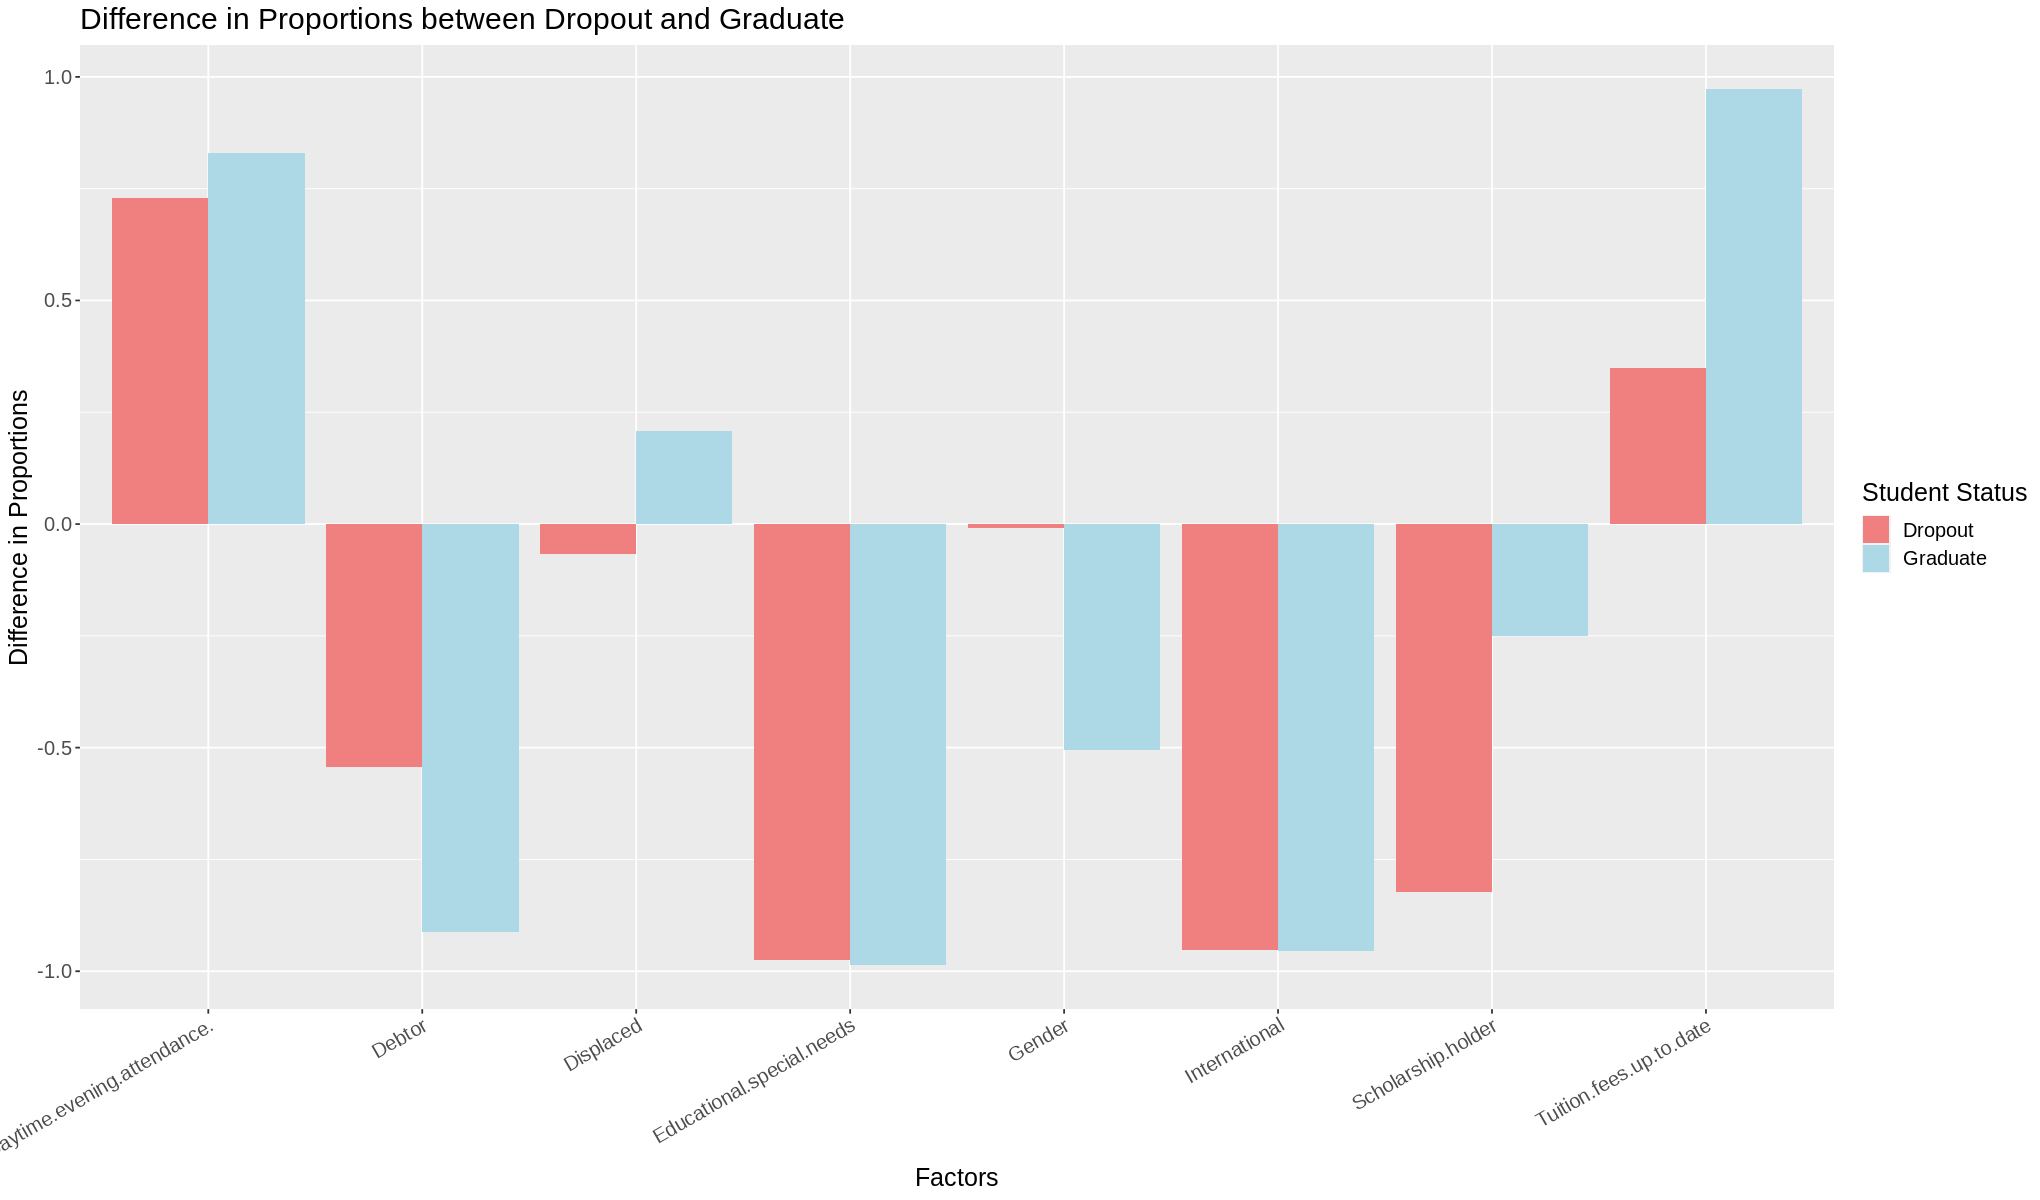

In [9]:
# visualization
options(repr.plot.width=17, repr.plot.height=10) # setting the plot dimensions for better visibility

# creating a bar chart using ggplot2
plotting <- ggplot(combined_diff, aes(x = factors, y = diff, fill = status)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  labs(x = "Factors", y = "Difference in Proportions", 
       title = "Difference in Proportions between Dropout and Graduate", 
       fill = "Student Status") +
  scale_fill_manual(values = c("Dropout" = "lightcoral", "Graduate" = "lightblue")) +
  theme(text = element_text(size = 15))
plotting

<center>Figure 2.1: Comparison of Dropouts' and Graduates' proportions of numerical variables</center>

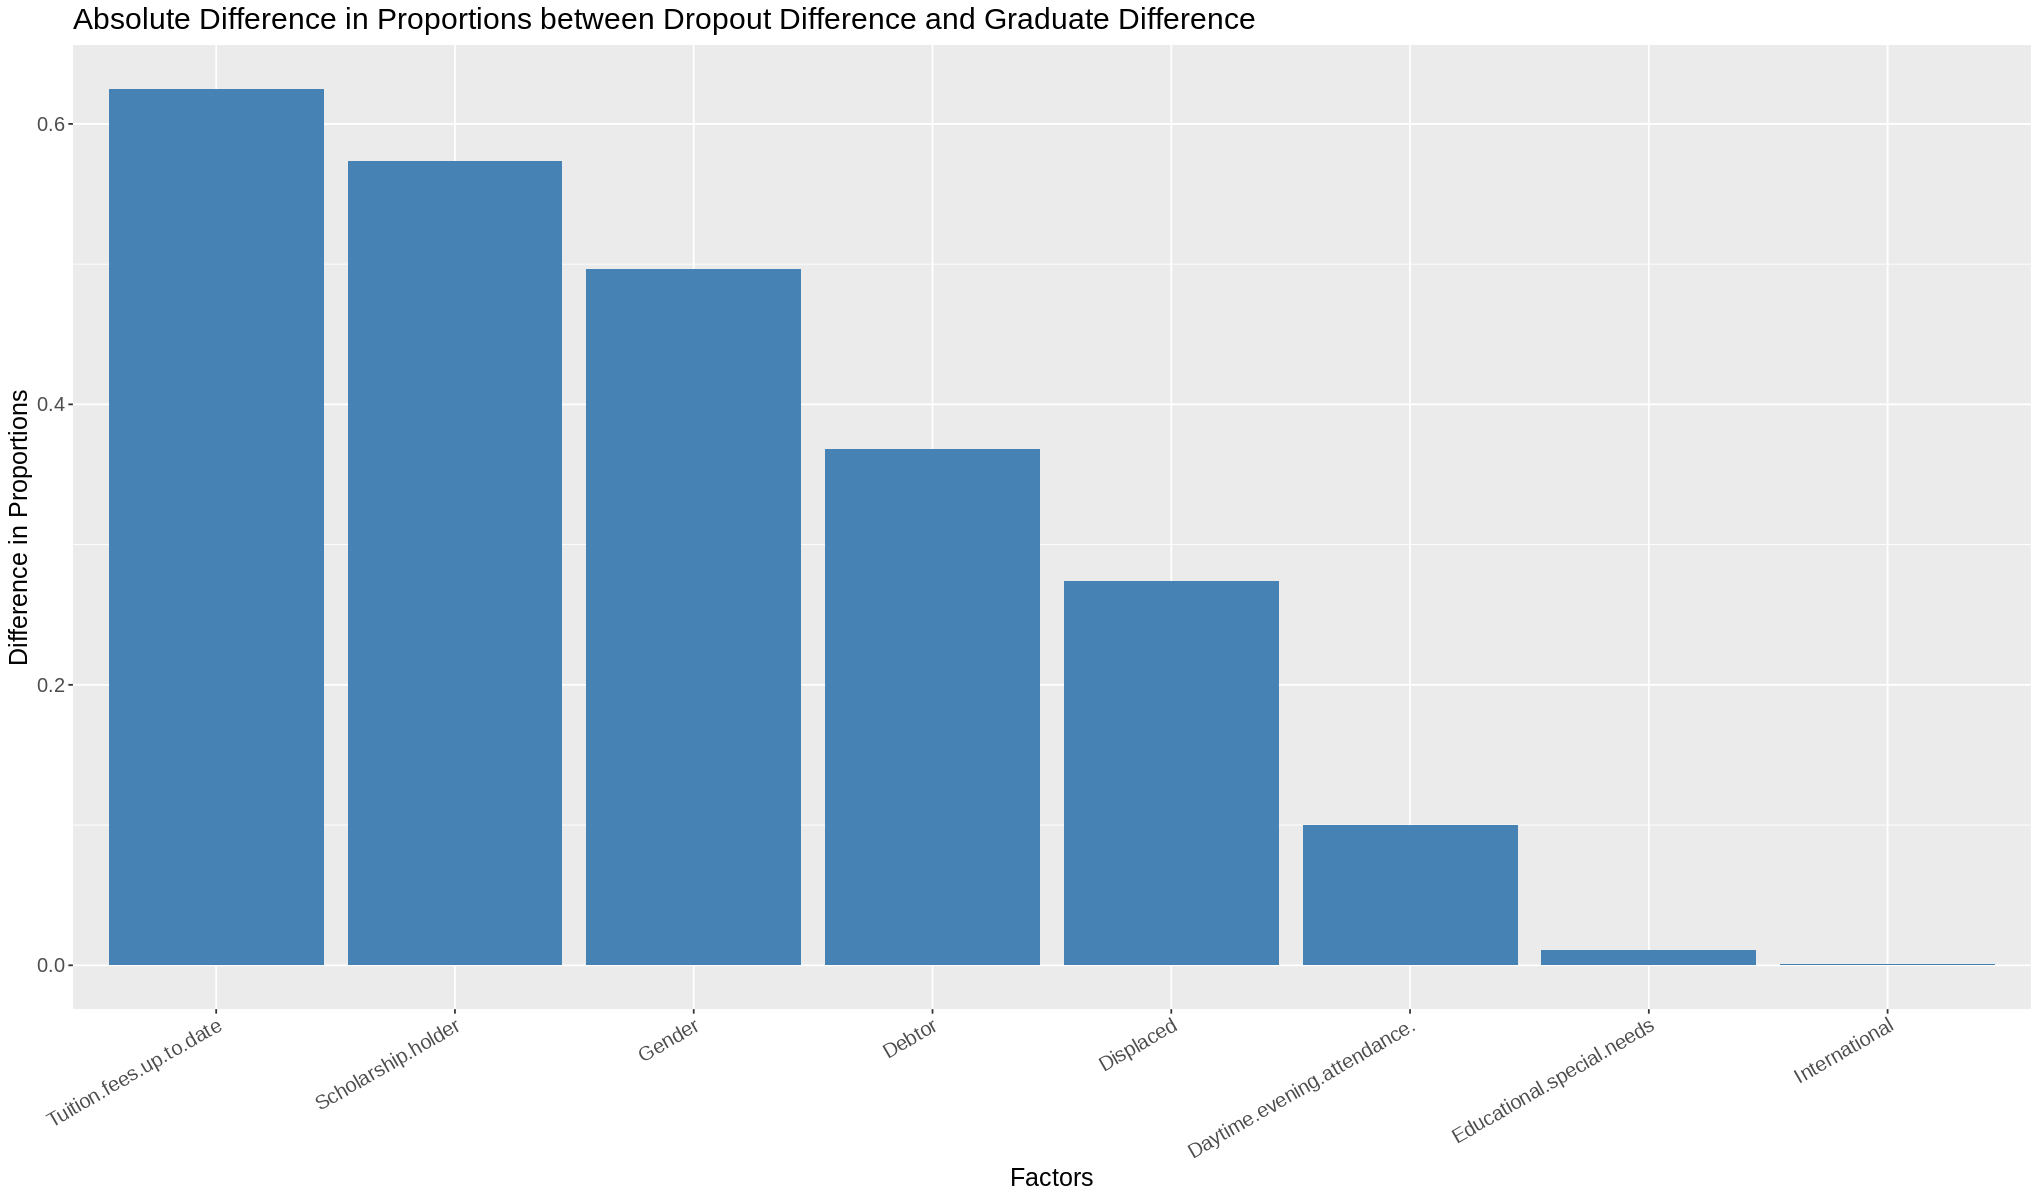

In [10]:
options(repr.plot.width=17, repr.plot.height=10) # setting the plot dimensions for better visibility

# creating a bar chart for absolute differences using ggplot2
diff_plot <- ggplot(final_diff_abs, aes(x = reorder(factors, -difference_abs), y = difference_abs)) +
  geom_bar(stat = "identity", position = position_dodge(), fill = "steelblue") +
  theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  labs(x = "Factors", y = "Difference in Proportions", 
       title = "Absolute Difference in Proportions between Dropout Difference and Graduate Difference") +
  theme(text = element_text(size = 15))
diff_plot

<center>Figure 2.2: Differences in proportions of numerical variables for Dropouts and Graduates</center>

By comparing the differences shown in the plot (Figure2.2) above, we think four of them (**Tuition.fees.up.to.date**, **Debtor**, **Scholarship.holder**, **Gender**) have the most obvious difference here, so we choose them as preselected variable used for further selection below.

For numerical variables, we directly draw the distributions of different status with each variable. Each histogram shows the distribution of each variavles, and each colour representing each status. We will choose the variables with the most obvious differences in the histograms under different academic statuses since this means the variables may contribute to a student's different academic statuses.

We use `facet_grid()` with the argument `cols = vars(Target))` to divide each histogram according to the unique values in the Target variable.

In [11]:
# creating a series of histogram plots for different variables in the dataset

# histogram for Marital status
Marital_dis <- ggplot(students_numerical_data, aes(x = Marital.status, fill = Target)) +
    geom_histogram(binwidth = 0.5) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Marital status", fill = "Study Status") +
    theme(text = element_text(size = 10))

# histogram for Application mode
AppMode_dis <- ggplot(students_numerical_data, aes(x = Application.mode, fill = Target)) +
    geom_histogram(binwidth = 5) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Application mode", fill = "Study Status") +
    theme(text = element_text(size = 10))

# histogram for Application order
AppOrder_dis <- ggplot(students_numerical_data, aes(x = Application.order, fill = Target)) +
    geom_histogram(binwidth = 1) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Application order", fill = "Study Status") +
    theme(text = element_text(size = 10))

# histogram for Course
Course_dis<- ggplot(students_numerical_data, aes(x=Course, fill=Target))+
    geom_histogram(binwidth = 1000)+
    facet_grid(cols= vars(Target))+
    labs(x="Course",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Previous qualification
PrevQual_dis<- ggplot(students_numerical_data, aes (x=Previous.qualification, fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Previous qualification",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Previous qualification grade
PrevQualGrade_dis <- ggplot(students_numerical_data, aes(x = Previous.qualification..grade., fill = Target)) +
    geom_histogram(binwidth = 7) +
    facet_grid(cols = vars(Target)) +
    labs(x = "Previous qualification (grade)", fill = "Study Status") +
    theme(text = element_text(size = 10))

# histogram for Nationality
Nationality_dis<- students_numerical_data|>
    ggplot(aes(x=Nacionality, fill=Target))+
    geom_histogram(binwidth = 10) +
    facet_grid(cols= vars(Target))+
    labs(x="Nacionality",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Mother's qualification
MotherQual_dis<-students_numerical_data|>
    ggplot(aes(x=Mother.s.qualification , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Mother’s qualification",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Father's qualification
FatherQual_dis<-students_numerical_data|>
    ggplot(aes(x=Father.s.qualification , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Father’s qualification",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Mother's occupation
MotherOccu_dis<-students_numerical_data|>
    ggplot(aes(x= Mother.s.occupation, fill=Target))+
    geom_histogram(binwidth = 13)+
    facet_grid(cols= vars(Target))+
    labs(x="Mother’s occupation",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Father's occupation
FatherOccu_dis<-students_numerical_data|>
    ggplot(aes(x= Father.s.occupation, fill=Target))+
    geom_histogram(binwidth = 13)+
    facet_grid(cols= vars(Target))+
    labs(x="Father’s occupation",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Admission grade
AdmissionGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Admission.grade , fill=Target))+
    geom_histogram(binwidth = 7)+
    facet_grid(cols= vars(Target))+
    labs(x="Admission grade",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Age at enrollment
AgeEnroll_dis<-students_numerical_data|>
    ggplot(aes(x=Age.at.enrollment , fill=Target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols= vars(Target))+
    labs(x="Age at enrollment",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(credited)
CurUnit1SemCrd_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..credited., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester(credited)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(erolled)
CurUnit1SemEnr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..enrolled., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester(erolled)", fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(evaluation)
CurUnit1SemEvalu_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..evaluations., fill=Target))+
    geom_histogram(binwidth = 4)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the first semester (evaluation)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(approved)
CurUnit1SemAppr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..approved., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (approved)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(grade)
CurUnit1SemGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..grade., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (grade)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 1st semester(without evaluations)
CurUnit1SemNoEval_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.1st.sem..without.evaluations., fill=Target))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units in the 1st semester (without evaluations)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(credited)
CurUnit2SemCrd_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..credited., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem(credited)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(enrolled)
CurUnit2SemEnr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..enrolled., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (enrolled)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(without evaluations)
CurUnit2SemNoEval_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..without.evaluations., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (without evaluations)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(evaluations)
CurUnit2SemEvalu_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..evaluations., fill=Target))+
    geom_histogram(binwidth = 3)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (evaluations)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(approved)
CurUnit2SemAppr_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..approved., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (approved)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Curricular units in the 2nd semester(grade)
CurUnit2SemGrade_dis<-students_numerical_data|>
    ggplot(aes(x=Curricular.units.2nd.sem..grade., fill=Target))+
    geom_histogram(binwidth = 2)+
    facet_grid(cols= vars(Target))+
    labs(x="Curricular units 2nd.sem (grade)",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Unemployment rate
UnempRate_dis<-students_numerical_data|>
    ggplot(aes(x=Unemployment.rate, fill=Target))+
    geom_histogram(binwidth = 0.7)+
    facet_grid(cols= vars(Target))+
    labs(x="Unemployment rate",fill="study status")+
    theme(text=element_text(size=10))

# histogram for Inflation rate
InflaRate_dis<-students_numerical_data|>
    ggplot(aes(x=Inflation.rate, fill=Target))+
    geom_histogram(binwidth = 0.5)+
    facet_grid(cols= vars(Target))+
    labs(x="Inflation rate",fill="study status")+
    theme(text=element_text(size=10))

# histogram for GDP
GDP_dis<-students_numerical_data|>
    ggplot(aes(x=GDP, fill=Target))+
    geom_histogram(binwidth = 0.7)+
    facet_grid(cols= vars(Target))+
    labs(x="GDP",fill="study status")+
    theme(text=element_text(size=10))

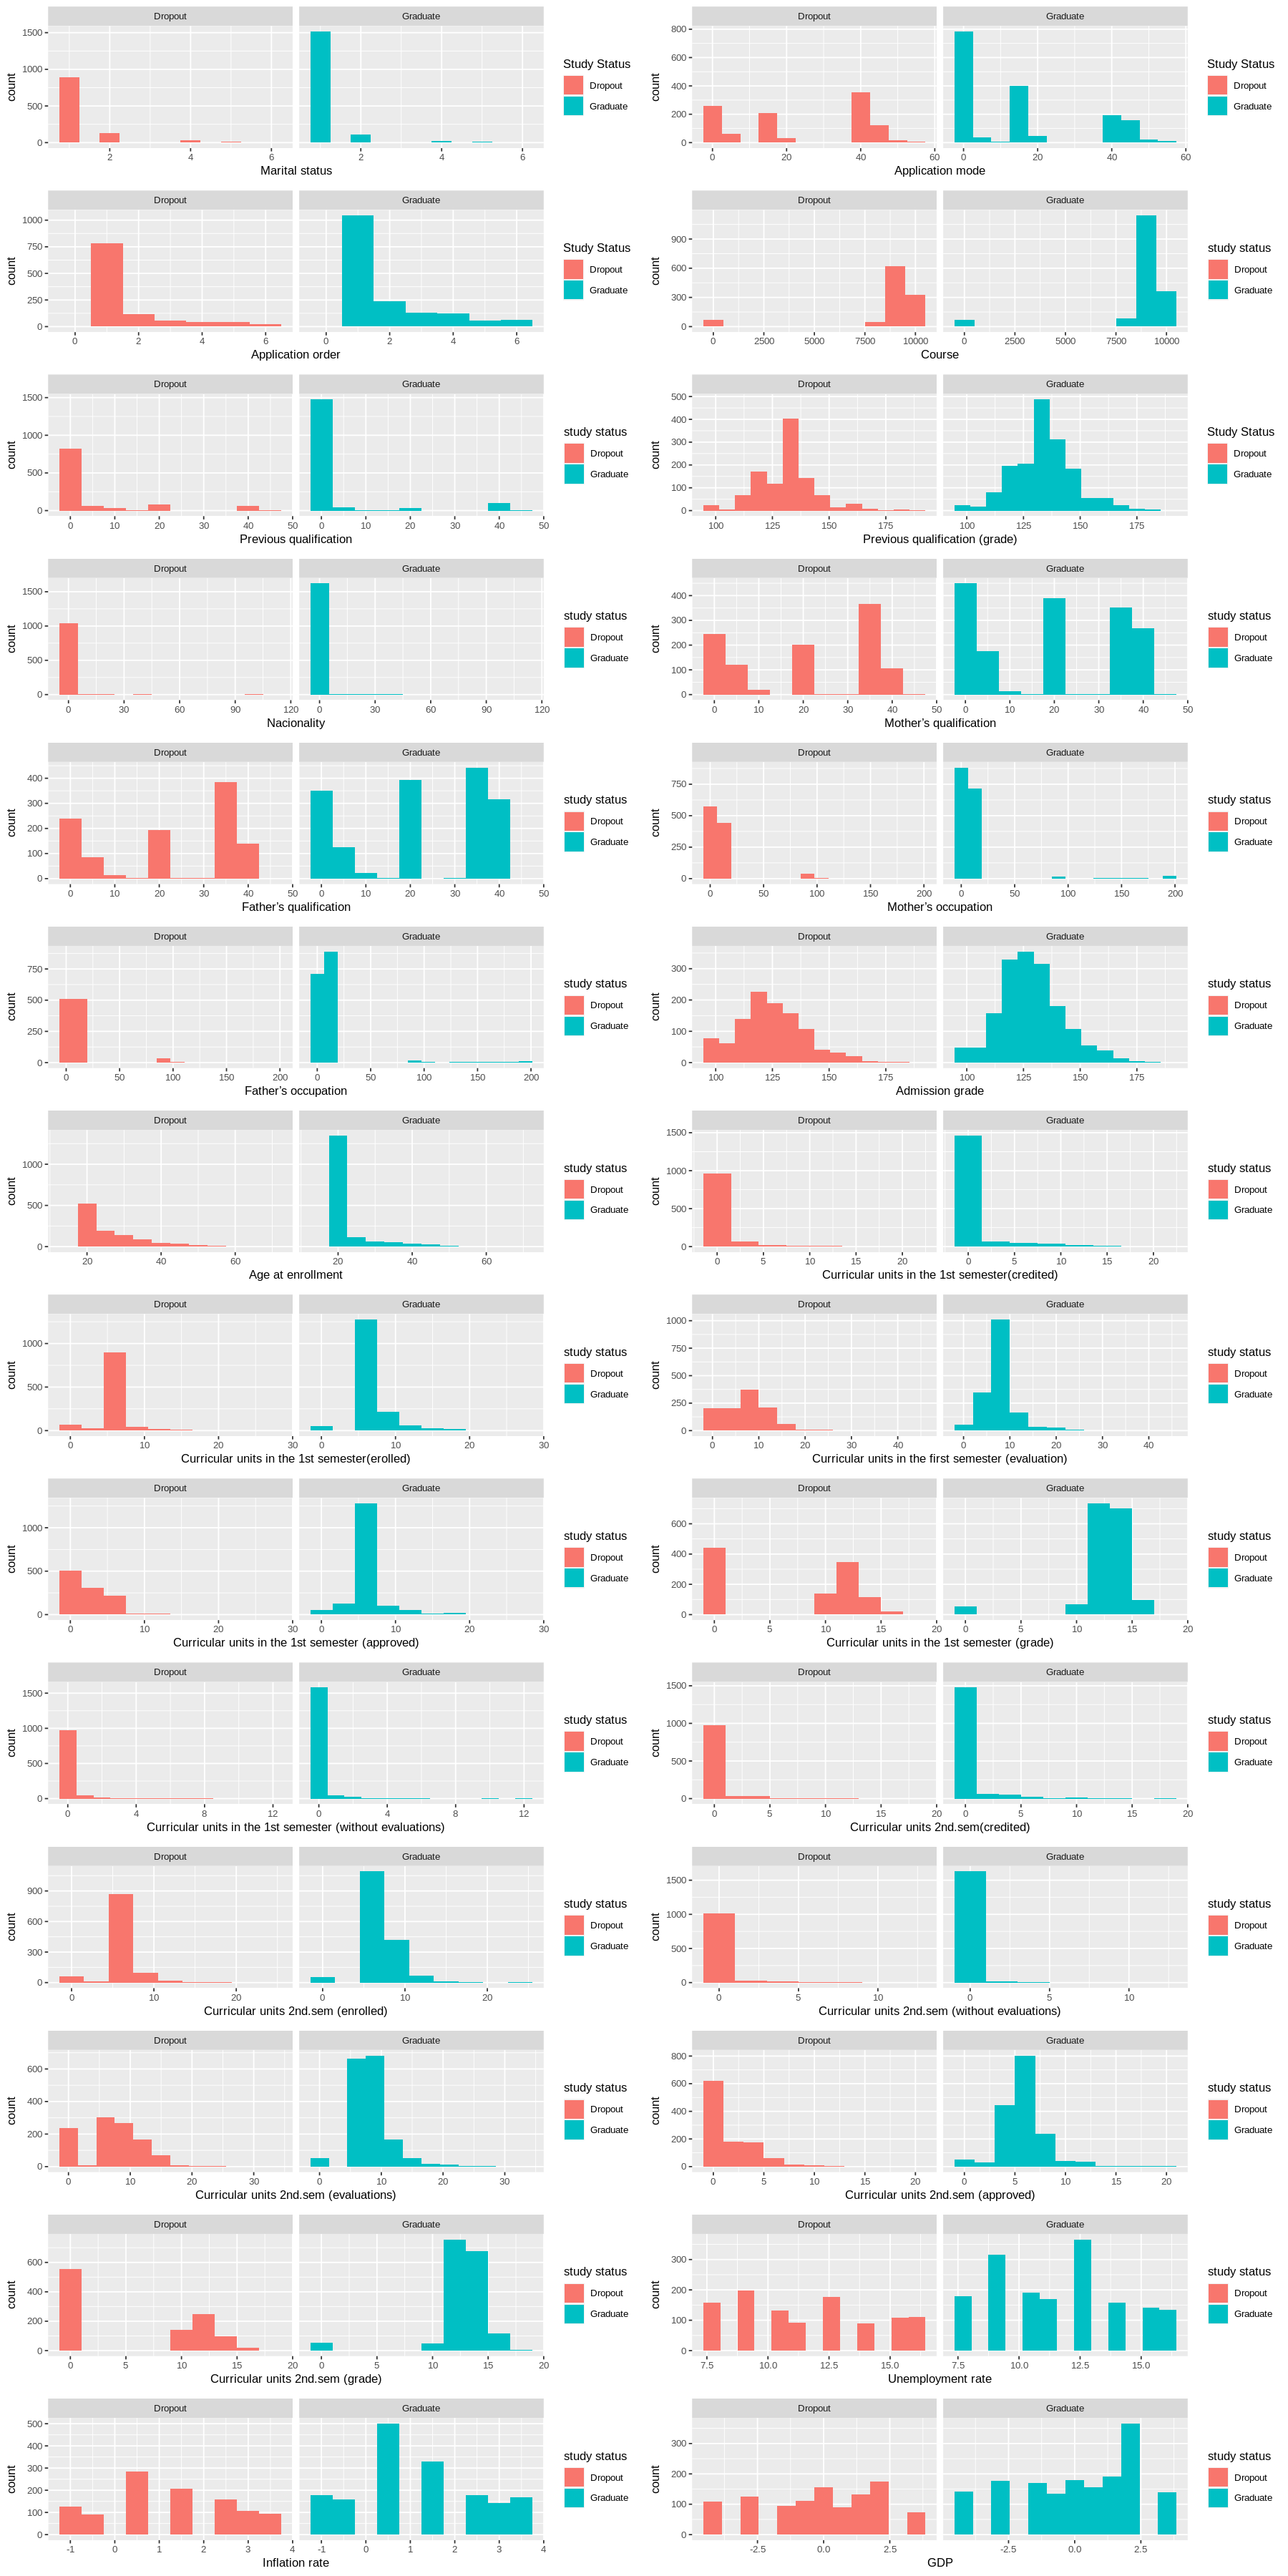

In [12]:
options(repr.plot.width = 15, repr.plot.height = 30)

# combine these plots into a grid layout
plot_grid(Marital_dis, AppMode_dis, AppOrder_dis, Course_dis, PrevQual_dis, 
          PrevQualGrade_dis, Nationality_dis, MotherQual_dis, FatherQual_dis,  
          MotherOccu_dis, FatherOccu_dis, AdmissionGrade_dis, AgeEnroll_dis,
          CurUnit1SemCrd_dis, CurUnit1SemEnr_dis, CurUnit1SemEvalu_dis, 
          CurUnit1SemAppr_dis, CurUnit1SemGrade_dis, CurUnit1SemNoEval_dis,
          CurUnit2SemCrd_dis, CurUnit2SemEnr_dis, CurUnit2SemNoEval_dis,  
          CurUnit2SemEvalu_dis, CurUnit2SemAppr_dis, CurUnit2SemGrade_dis,
          UnempRate_dis, InflaRate_dis, GDP_dis, 
        align = "v",ncol = 2) 

<center>Figure 3: Comparison for numerical variables distributions</center>

By comparing the distributions of each pair of the plots above (Figure 3), we think five of them (**Curricular.units.2nd.sem..grade.**, **Curricular.units.2nd.sem..approved.**, **Curricular.units.1st.sem..approved.**, **Curricular.units.1st.sem..grade.**, **Application.mode**) have the most obvious difference in distribution of two students' statuses, so we choose them as preselected variable used for further selection below.

Here we use the forward selection method to further identify the most effective predictors that maximize the accuracy of prediction. 

We initiate this process with a model that doesn't contain any predictors. The following 3 steps are then iteratively executed until all predictors are utilized:
   * For every predictor that has not been used yet, incorporate it into the model to create a candidate model.
   * Fine-tune each candidate model.
   * Update the model to be the candidate model that yields the highest accuracy in cross-validation.

Lastly, select the model that offers the optimal balance between accuracy and simplicity.

In [13]:
# set.seed(2023)
# select a subset of the columns from the students_train dataset
students_subset <- students_train |>
    select(Target, Curricular.units.2nd.sem..grade., Curricular.units.2nd.sem..approved., Tuition.fees.up.to.date,
           Curricular.units.1st.sem..approved., Debtor, Scholarship.holder, Gender,
           Curricular.units.1st.sem..grade., Application.mode)

# extract the names of the columns excluding the 'Target' column
names <- colnames(students_subset |> select(-Target))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
students_vfold <- vfold_cv(students_subset, v = 5, strata = Target)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Target", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        students_recipe <- recipe(as.formula(model_string), 
                                data = students_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(students_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = students_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Target ~ Curricular.units.2nd.sem..grade.,0.7717742
2,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.,0.8710031
3,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date,0.8923185
4,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.,0.8967303
5,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor,0.8989382
6,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder,0.8996735
7,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.,0.8993065
8,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.+Gender,0.8967296
9,Target ~ Curricular.units.2nd.sem..grade.+Curricular.units.2nd.sem..approved.+Tuition.fees.up.to.date+Curricular.units.1st.sem..approved.+Debtor+Scholarship.holder+Curricular.units.1st.sem..grade.+Gender+Application.mode,0.8996695


<center>Table 4: Accuracy and corresponding predictors</center>

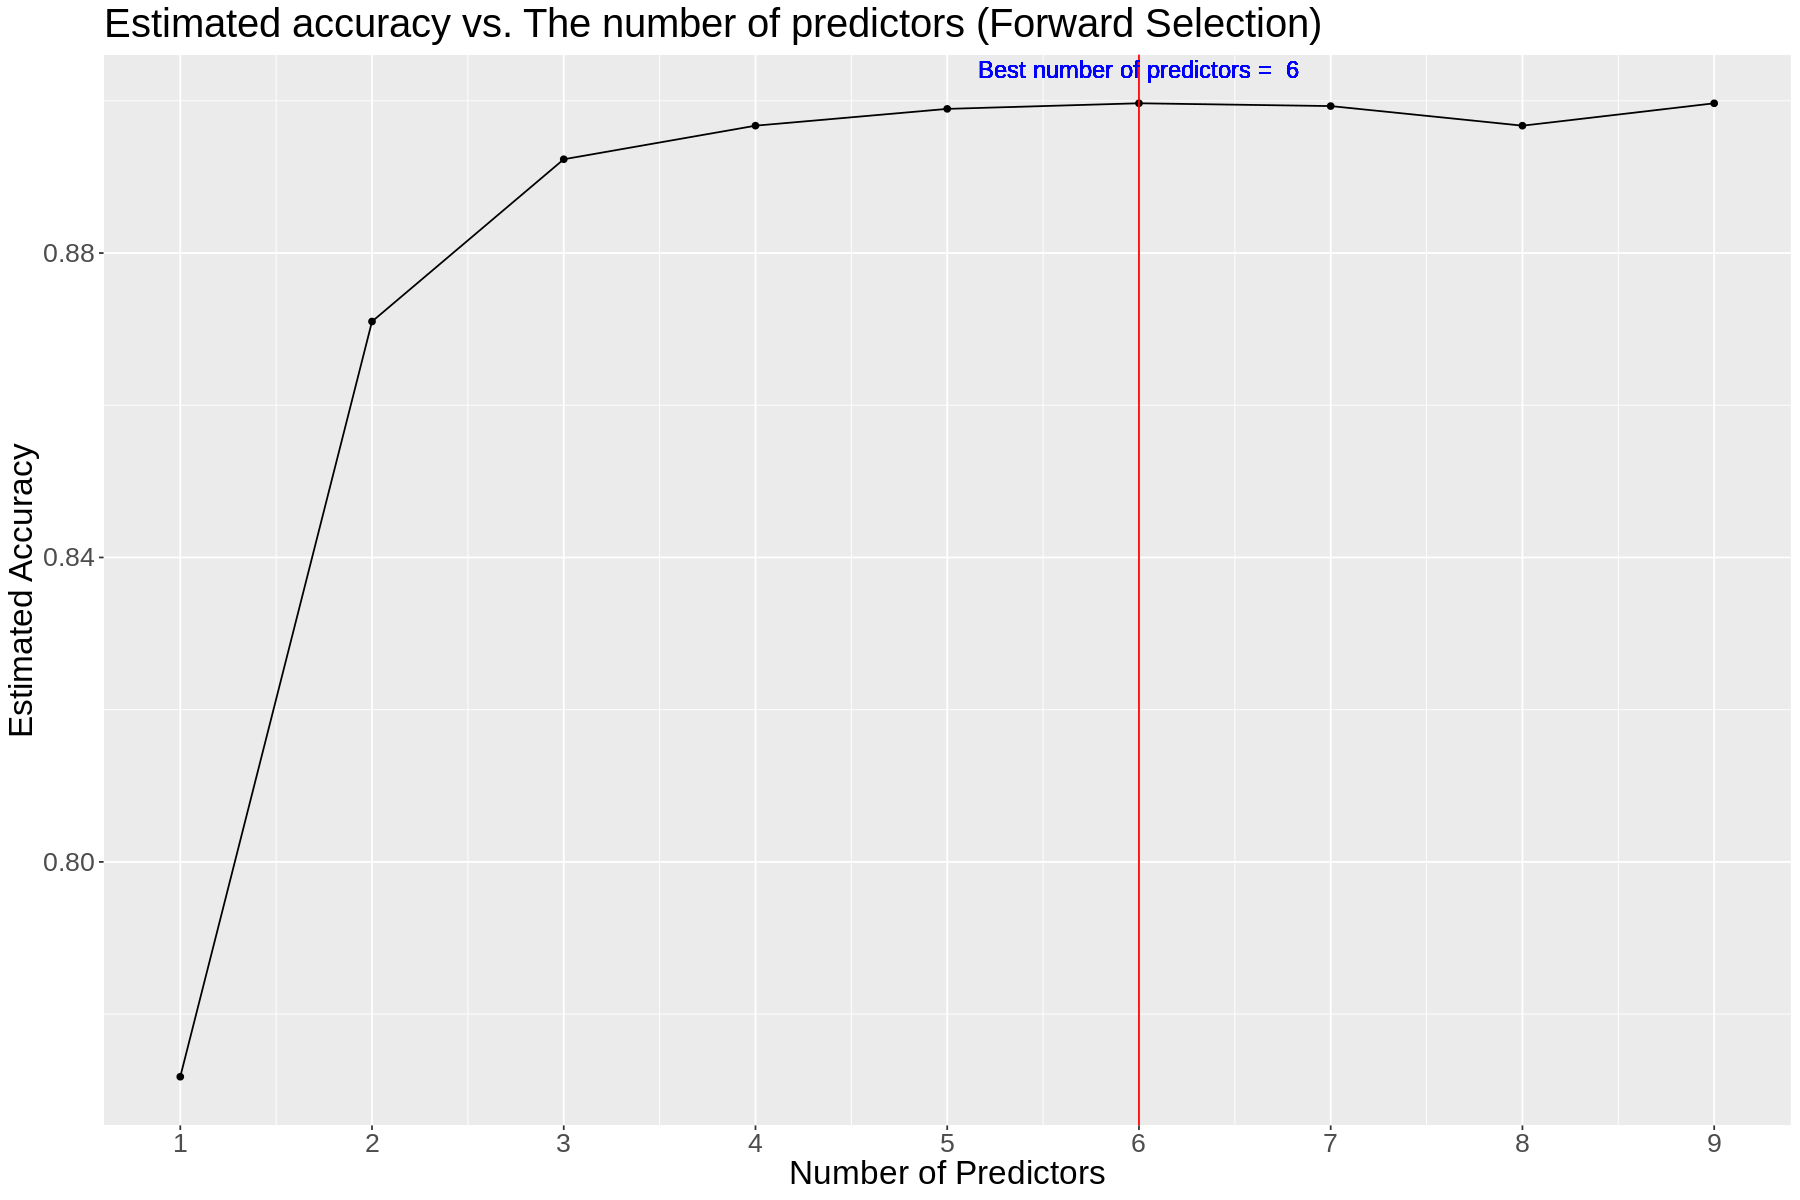

In [14]:
options(repr.plot.width = 15, repr.plot.height = 10)
# plotting estimated accuracy vs the number of predictors

# find the index of the highest accuracy and get the corresponding number of predictors
best_predrs <- accuracies$size[which.max(accuracies$accuracy)]

# find the maximum accuracy achieved
max_accuracy_pred <- max(accuracies$accuracy)

# creates a plot that visualizes how the estimated accuracy of the model changes as the number of predictors used in the model increases
ggplot(accuracies, aes(x = size, y = accuracy)) +
    geom_point() + # To show each point
    geom_line() +  # To connect points with lines
    geom_vline(xintercept = best_predrs, color = "red") +
    labs(x = "Number of Predictors", y = "Estimated Accuracy") +
    ggtitle("Estimated accuracy vs. The number of predictors (Forward Selection)") +
    geom_text(aes(x = best_predrs, y = max_accuracy_pred, label = paste("Best number of predictors = ", best_predrs)), 
            vjust = -1.5, color = "blue", size = 5) +
    scale_x_continuous(limits = c(1,9), breaks = seq(1, 19)) +
    theme(text = element_text(size = 20)) 


<center>Figure 4: Plot of Table 4</center>

From the result, we can see when helpful predictors are added, the estimated accuracy increases; whereas adding irrelevant variables causes the accuracy to either exhibit
small fluctuations or decrease. Thus, finally we choose **6** variables below as our predictors:
- Tuition fees up to date: Whether the student's tuition fees are up to date. (1-yes 0-no)
- Scholarship holder: Whether the student is a scholarship holder. (1-yes 0-no)
- Debtor: Whether the student is a debtor. (1-yes 0-no)
- Curricular units 1st sem (approved): The number of curricular units approved by the student in the 1st semester. 
- Curricular units 2nd sem (approved): The number of curricular units approved by the student in the 2nd semester. 
- Curricular units 2nd sem (grade): Student's grade average in the 2nd semester (between 1 - 20).

### 2.4 KNN Classification modeling

Now we begin building our KNN classification classifier to answer a predictive question: Given that a student with the related infomation, could we predict he or she will graduate or drop out?

In KNN classification model, we tune the model with cross-validation to find the ideal K value.
- We first define a recipe with the 6 predictors we choose. We further scale and center our predictors using `step_scale()`.
- We then define the specification for our k-NN model using `weight_func = "rectangular"`. We set the K as a tunable parameter `tune()`, because we want to find the best value for the number of neighbors (k) by trying out different values.
- Then, we perform cross-validation with 10 folds. This approach splits the dataset into 10 parts, using 9 of them for training and the remaining one for validation in each iteration.
- We create a tibble named `gridvals` which contains a sequence of numbers from 1 to 15 used as different values for **k**.
- Next, we combine the recipe and the model specification in a workflow. Apply the `tune_grid()` to perform a grid search over the different values of k. And collect the metrics from the tuning process, specifically focusing on accuracy.
- Finally, our result contains the accuracies for different values of k (number of neighbors) and can be used for further analysis or visualization to determine the best k-value for the model.

In [15]:
set.seed(2023) # set the random seed to ensure reproducibility

# create a recipe specifying the target variable and the predictors
students_recipe <- recipe(Target ~ Tuition.fees.up.to.date + Scholarship.holder + Debtor + Curricular.units.1st.sem..approved. + Curricular.units.2nd.sem..approved. + Curricular.units.2nd.sem..grade., data = students_train) |>
    step_scale(all_predictors()) |>
    step_scale(all_predictors())

# define the k-NN model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# create a stratified cross-validation scheme with 10 folds
students_vfold <- vfold_cv(students_train, v = 10 , strata= Target) 

#store the grid values for the number of neighbors
gridvals <- tibble(neighbors = seq(1,15))

# construct a workflow and add the recipe and model specification
# Filter the collected metrics to keep only the accuracy values
students_results <- workflow() |>
    add_recipe(students_recipe) |>
    add_model(knn_spec)|>
    tune_grid(resamples = students_vfold, grid = gridvals)|>
    collect_metrics()|>
    filter(.metric == "accuracy")
students_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8294800,10,0.004543726,Preprocessor1_Model01
2,accuracy,binary,0.8280053,10,0.004339223,Preprocessor1_Model02
3,accuracy,binary,0.8776140,10,0.003920155,Preprocessor1_Model03
4,accuracy,binary,0.8787169,10,0.003385170,Preprocessor1_Model04
5,accuracy,binary,0.8937879,10,0.006385228,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,accuracy,binary,0.8993135,10,0.007279133,Preprocessor1_Model12
13,accuracy,binary,0.8993122,10,0.006920636,Preprocessor1_Model13
14,accuracy,binary,0.8989472,10,0.006853777,Preprocessor1_Model14


<center>Table 5: Result of tuning the model</center>

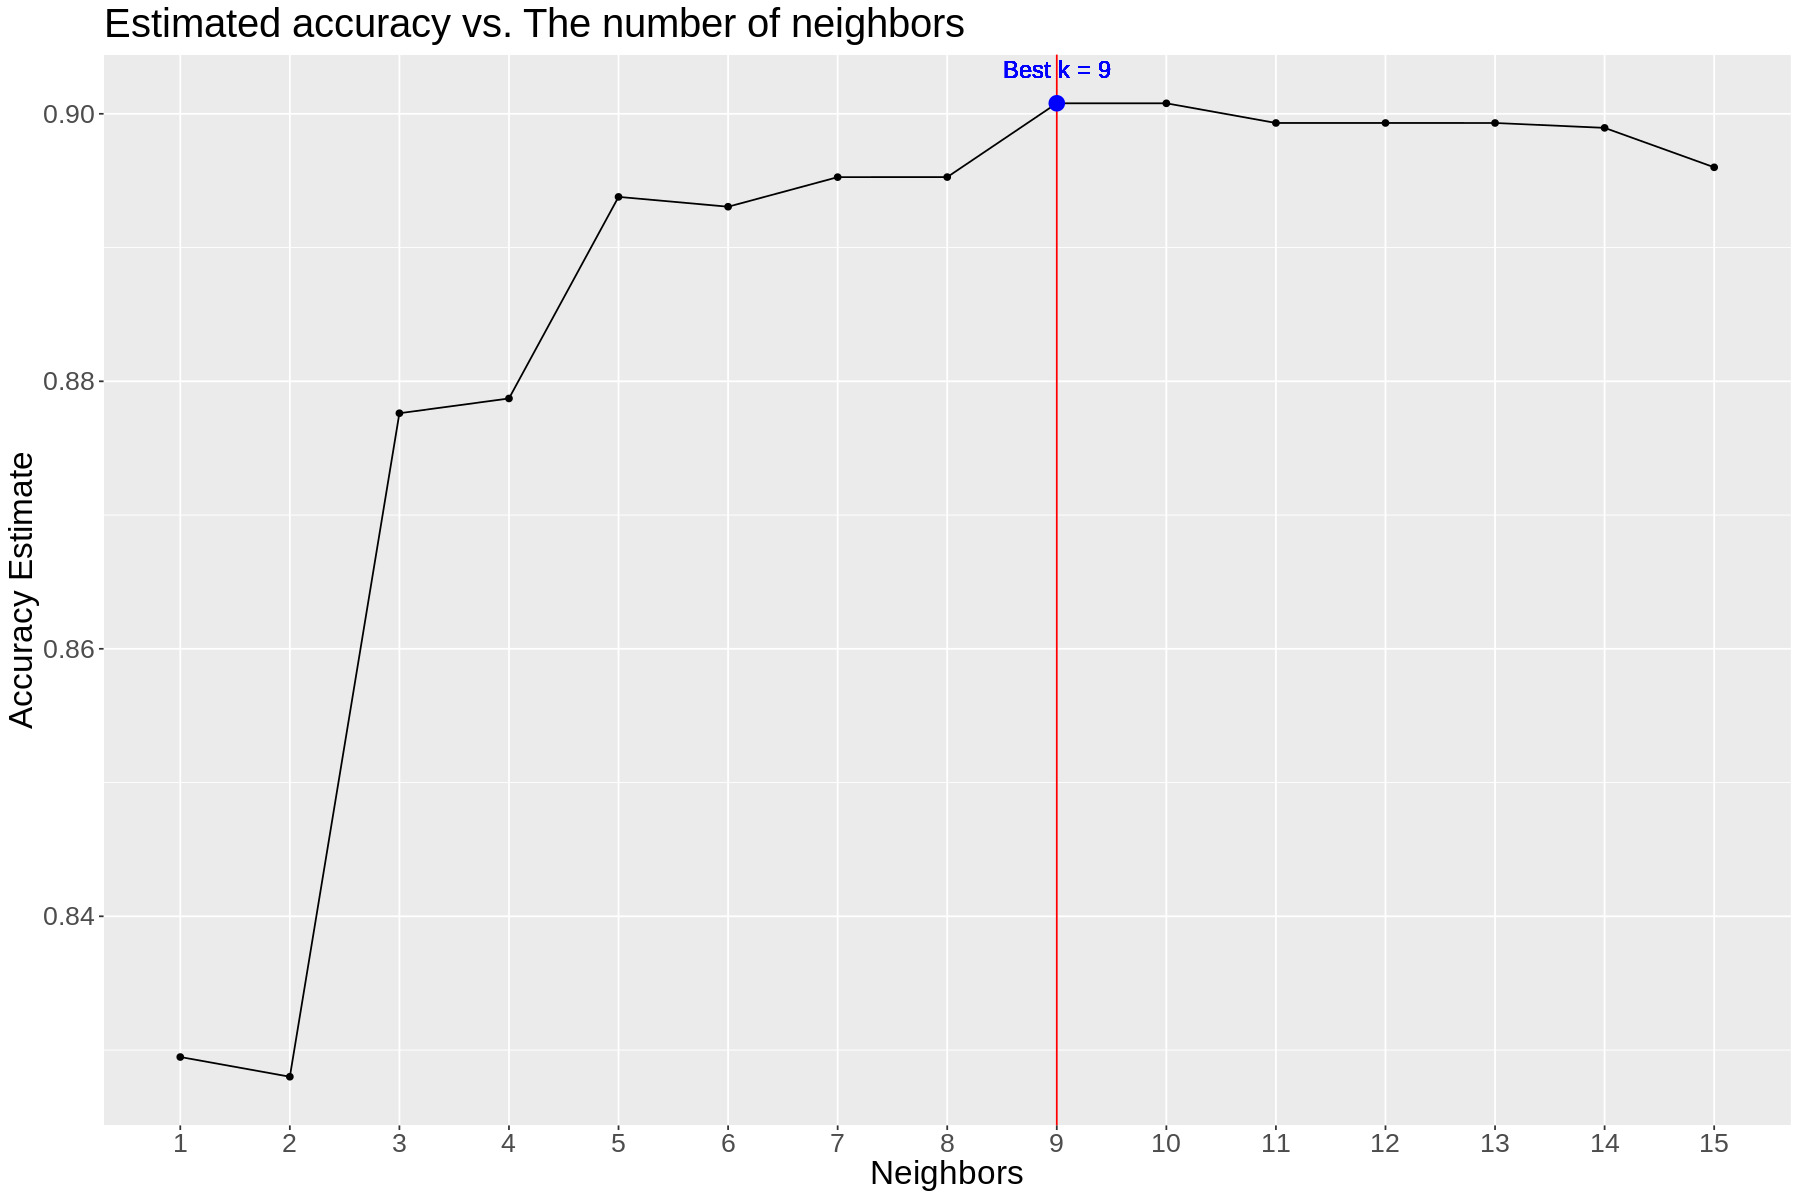

In [16]:
# determine the value of 'k' with the highest mean accuracy
best_k <- students_results$neighbors[which.max(students_results$mean)]

# find the maximum accuracy achieved among all values of 'k'
max_accuracy_k <- max(students_results$mean)

options(repr.plot.width = 15, repr.plot.height = 10)

# create a scatter plot with lines to show the relationship between the number of neighbors and the mean accuracy
accuracy_vs_k <- students_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = best_k, color = "red") +
    geom_point(data = subset(students_results, neighbors == best_k), aes(x = neighbors, y = mean), size = 4, color = "blue") + 
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Estimated accuracy vs. The number of neighbors") + 
    geom_text(aes(x = best_k, y = max_accuracy_k, label = paste("Best k =", best_k)), 
            vjust = -1.5, color = "blue", size = 5) +
    scale_x_continuous(limits = c(1,15), breaks = seq(1,15), minor_breaks = seq(1,15,1)) +
    theme(text = element_text(size = 20))
accuracy_vs_k

<center>Figure 5: Plot of estimated accurary vs the number of neighbors</center>

From the plot we can easily find that the best **k = 9**, we use this k value to build our classification model:

In [17]:
#with the best k:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

# create a workflow by adding the recipe and the k-NN model specification
# fit the model 
students_fit <- workflow() |>
    add_recipe(students_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = students_train )

Finally we conduct our KNN classification on the testing set to evaluate the accuracy by predicting the students' academic statuses:

In [18]:
#prediction:
students_predictions <- predict(students_fit , students_test) |> 
    bind_cols(students_test)

# Convert to factor
students_predictions$Target <- as.factor(students_predictions$Target)

# Compare the accuracy of predictions to the true values in the test set
students_acc <- students_predictions |> 
    metrics(truth = Target, estimate = .pred_class)  |>
    select(.metric, .estimate)|> 
    filter(.metric == "accuracy")
students_acc 

.metric,.estimate
<chr>,<dbl>
accuracy,0.8635864


<center>Table 6: Accuracy of the model</center>

According to the table 6, the accuracy of our predictions was at **86%**.

In order to visualize the results, we create a confusion matrix of our prediction to see the accurary represented in Figure 7. It can be observed that a total of 783 out of 909 predictions were true.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



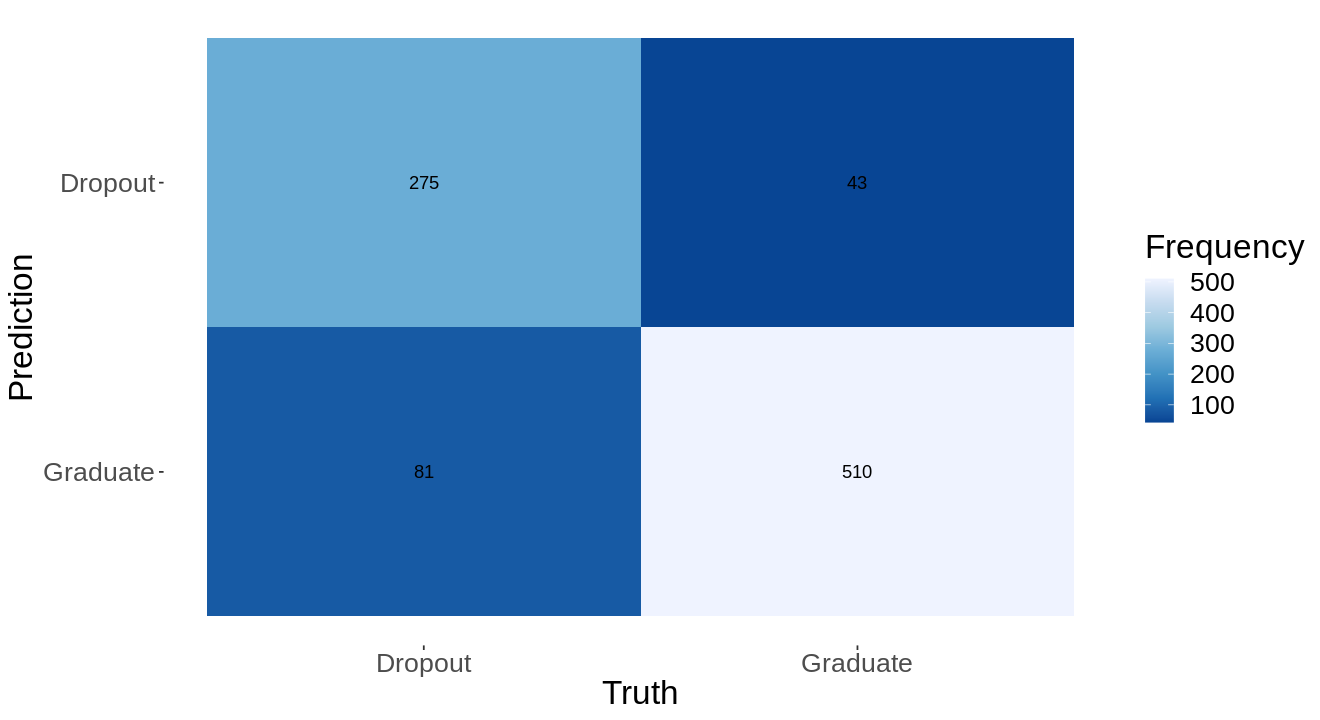

In [19]:
options(repr.plot.width = 11, repr.plot.height = 6)

# calculate the confusion matrix
students_mat <- students_predictions |>
    conf_mat(truth = Target, estimate = .pred_class)

# create a heatmap visualization of the confusion matrix
autoplot(students_mat, type = "heatmap") + 
    scale_fill_distiller(name = "Frequency") +
    theme(legend.position = "right", text = element_text(size = 20), plot.caption = element_text(size = 20, hjust = 0))

<center>Figure 7: Confusion matrix of the accuracy of the model</center>

### 2.5 Visualization of the model

To visualize the effect of our classification model,  as examples, we create plots for the prediction result of one of the binary variables and numerical variables respectively, and then compare the plots to the plots of actual data.

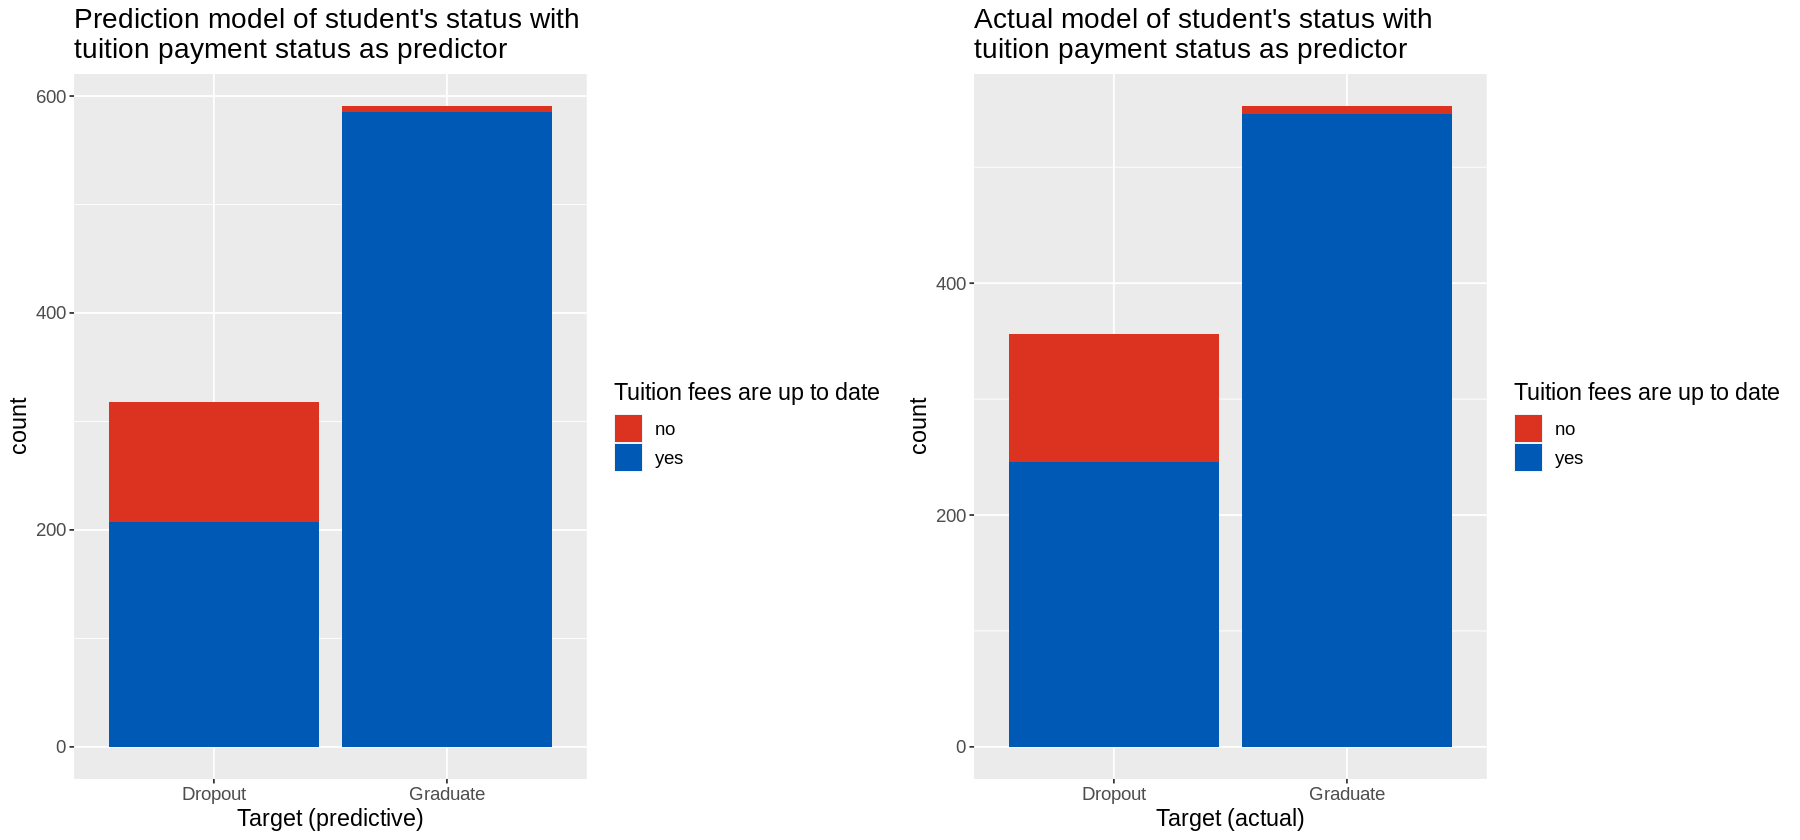

In [20]:
options(repr.plot.width = 15, repr.plot.height = 7)

# plot the prediction model of student's status with tuition payment status as a predictor
tuition_prediction <- students_predictions |>
    ggplot(aes(x=.pred_class, fill = as_factor(Tuition.fees.up.to.date))) +
    geom_bar() +
     labs(x = "Target (predictive)",
          fill = "Tuition fees are up to date") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
        ggtitle("Prediction model of student's status with \ntuition payment status as predictor")

# plot the actual model of student's status with tuition payment status as a predictor
tuition_actual <- students_predictions |>
    ggplot(aes(x = Target, fill = as_factor(Tuition.fees.up.to.date))) +
    geom_bar()+
     labs(x = "Target (actual)",
          fill = "Tuition fees are up to date") +
         theme(text = element_text(size = 14)) +
         scale_fill_manual(labels = c("no", "yes"), values = c("#DC3220", "#005AB5"))+
         ggtitle("Actual model of student's status with \ntuition payment status as predictor")

# combine the two plots into a grid layout
plot_grid(tuition_prediction,tuition_actual, ncol = 2)

<center>Figure 8.1: Comparison of predictive classification (binary variables) and actual classification of if Tuition fees is up to date</center>

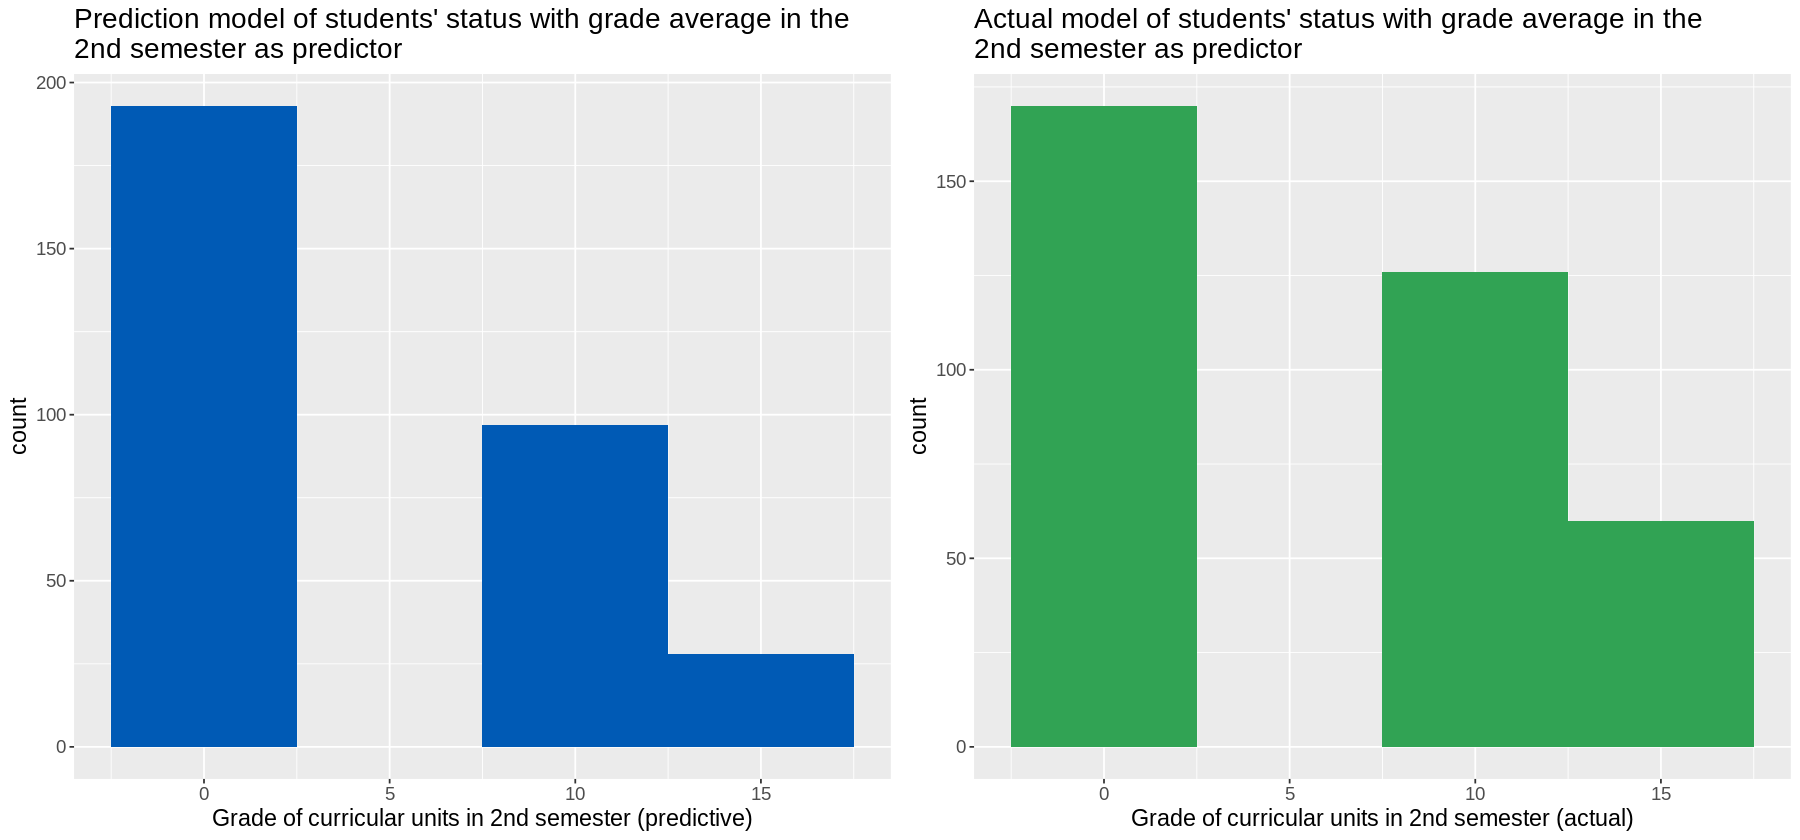

In [21]:
sem2Grade_prediction_dis <- students_predictions |>
# the predict result is diabetes label
  filter(.pred_class == "Dropout") |> # filter the predicted results for the "Dropout" Target
  ggplot(aes(x = Curricular.units.2nd.sem..grade.)) +
  geom_histogram(binwidth = 5, fill = "#005AB5")+
  xlab("Grade of curricular units in 2nd semester (predictive)")+
  theme(text = element_text(size = 14))+
ggtitle("Prediction model of students' status with grade average in the \n2nd semester as predictor")

sem2Grade_actual_dis <- students_predictions |>
# the predict result is diabetes label
  filter(Target == "Dropout") |> # filter the actual results for the "Dropout" Target
  ggplot(aes(x = Curricular.units.2nd.sem..grade.)) +
  geom_histogram(binwidth = 5, fill = "#31a354")+
  xlab("Grade of curricular units in 2nd semester (actual)") +
  theme(text = element_text(size = 14))+
ggtitle("Actual model of students' status with grade average in the \n2nd semester as predictor")

# combine the two plots into a grid layout with two columns
plot_grid(sem2Grade_prediction_dis, sem2Grade_actual_dis, ncol = 2)

<center>Figure 8.2: Comparison of predictive classification (numerical variables) and actual classification of grade average in the 2nd semester</center>

The example bar charts show the relationship between "tuition fees up to date" and "second-semester grades" and the corresponding dropouts and graduates. By comparing these plots, we can see that this pattern appears in both Predicted and Actual model plots, which means our classification predictive model is doing very well.

## 3. Discussion

Based on the analysis above, we find that using six predictors (Tuition.fees.up.to.date, Scholarship.holder, Debtor, Curricular.units.1st.sem..approved., Curricular.units.2nd.sem..approved. , Curricular.units.2nd.sem..grade.) is the most accurate (Table 4 & Figure 4) to predict students' academic status with the accuracy of **86.14%** (Table 6).

By wrangling and selecting the most related variables in the dataset, we can determine which factors should be paid more attention on by the school to help students to achieve academic success (Figure 2.2 & Figure 3). In terms of the expectations, we anticipated that the academic performance and personal or family economic conditions would play a significant role in predicting dropout and academic success<sup>[4]</sup>. Overall, our results were consistent with these expectations, For instance, better academic grades, a larger number of approved curricular units over the semesters and the scholarship recipient could indicate a greater possibility of successful completion. Also the status about tuition fee payments and debtor status could be viewed as the indicator of the student’s financial situation to predict the possibility of dropping out. 

In conclusion,  we hope through our finding, educational institutions can gain some data-based insights on how to allocate resources and develop effective policies in the areas where students are more likely to encounter difficulties. For example, developing targeted financial support programs to mitigate students’ financial challenges, or monitoring students' academic progress in school by administrators and proper motivation of students<sup>[5]</sup>. By understanding these factors, educational institutions can develop corresponding approaches and create a more equitable learning environment to help students improve their successful graduation rates.

Further questions:
1. How does the choice of application mode impact students’ academic performance and overall success in the study?
2. Does our model have limitations? Can our model fit to all countries, and if not what data and method should we change or add accordingly?

## Reference
1. Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022, October 28). Predicting Student Dropout and Academic Success. MDPI. https://doi.org/10.3390/data7110146
2. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
3. K-Nearest Neighbor in Machine Learning. (n.d.). https://www.knowledgehut.com/blog/data-science/knn-for-machine-learning
4. Long, Z. A., & Noor, M. F. M. (2023). Factors Influencing Dropout Students in Higher Education. Education Research International, 2023.
5. Oragwu, A. A. (2020). MINIMIZING STUDENTS’DROPOUT RATES IN UNIVERSITIES FOR SUSTAINABLE DEVELOPMENT. International Journal of Educational Research and Policy Making, 3(1), 511-521.